In [ ]:
# ibis 설치

# !pip install 'ibis-framework[duckdb]'
# !pip install pins
# !pip install gcsfs

In [1]:
# 버전 확인
import ibis
print(ibis.__version__)  

11.0.0


In [3]:
# load library

import os, glob
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
# from plotnine import *

import ibis
import ibis.selectors as s
from ibis.interactive import *

In [4]:
# options 

ibis.options.interactive = True

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 내장 데이터 읽어오기

# peng = ibis.examples.penguins.fetch()
# peng

In [ ]:
# import seaborn as sns
# penguin = sns.load_dataset("penguins")
# penguin.to_csv("penguins.csv", index=False)

In [6]:
con = ibis.duckdb.connect("mydb.duckdb")
con.list_tables()

[]

In [15]:
table = con.read_csv("penguins.csv")
con.create_table("peng", table)

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ Male   │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ Female │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ Male   │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ NULL   │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ NULL   │
│ …       │ …         │              … │             … │                 … │           … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [8]:
con.list_tables()

['ibis_read_csv_crzczvxubrhwxenihmsj2k5jra']

In [ ]:
# 데이터 저장

# type(peng)
# peng.to_csv("peng.csv")

In [9]:
# 디렉토리 보기 및 파일 사이즈 보기

os.listdir()

!du -h penguins.csv

['mpg.csv',
 '.Rhistory',
 '연습장.ipynb',
 '.DS_Store',
 '04_numpy_training.ipynb',
 '99_크롤링_인터넷.ipynb',
 '(한화) DATA Eng ineering_안내문.pdf',
 '02_pandas_training.ipynb',
 'old',
 'mydb.duckdb',
 'iris.csv',
 '03_numpy_training.ipynb',
 '07_ibis_training.ipynb',
 '06_ibis_training.ipynb',
 '05_ibis_training.ipynb',
 '.Rapp.history',
 '분석용_student_cp949.csv',
 'taxi.csv',
 '강의_Python.key',
 '01_pandas_training.ipynb',
 '00_python_training.ipynb',
 'penguins.csv',
 '(한화) 프로그램 설치 안내.pdf']

 16K	penguins.csv


In [10]:
# 소스 보기

table.op().source
table.op().source.list_tables()

['ibis_read_csv_crzczvxubrhwxenihmsj2k5jra']

#### database에 있는 peng 테이블을 파이선에서 일종의 포인터 정의

In [17]:
peng = con.table("peng")

In [18]:
# 데이터 기초 정보 보기
peng.columns

peng.schema()

peng.info()

peng.describe()

('species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex')

ibis.Schema {
  species            string
  island             string
  bill_length_mm     float64
  bill_depth_mm      float64
  flipper_length_mm  float64
  body_mass_g        float64
  sex                string
}

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┓
┃ name              ┃ type    ┃ nullable ┃ nulls ┃ non_nulls ┃ null_frac ┃ pos   ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━┩
│ string            │ string  │ boolean  │ int64 │ int64     │ float64   │ int16 │
├───────────────────┼─────────┼──────────┼───────┼───────────┼───────────┼───────┤
│ species           │ string  │ True     │     0 │       344 │  0.000000 │     0 │
│ island            │ string  │ True     │     0 │       344 │  0.000000 │     1 │
│ bill_length_mm    │ float64 │ True     │     2 │       342 │  0.005814 │     2 │
│ bill_depth_mm     │ float64 │ True     │     2 │       342 │  0.005814 │     3 │
│ flipper_length_mm │ float64 │ True     │     2 │       342 │  0.005814 │     4 │
│ body_mass_g       │ float64 │ True     │     2 │       342 │  0.005814 │     5 │
│ sex               │ string  │ True     │    11 │       333 │  0.031977 │     6 │
└───────────────────┴─────────┴──────────┴───────┴───────────┴───────────┴───────┘

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ name              ┃ pos   ┃ type    ┃ count ┃ nulls ┃ unique ┃ mode   ┃ mean        ┃ std        ┃ min     ┃ p25      ┃ p50     ┃ p75     ┃ max     ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ string            │ int16 │ string  │ int64 │ int64 │ int64  │ string │ float64     │ float64    │ float64 │ float64  │ float64 │ float64 │ float64 │
├───────────────────┼───────┼─────────┼───────┼───────┼────────┼────────┼─────────────┼────────────┼─────────┼──────────┼─────────┼─────────┼─────────┤
│ sex               │     6 │ string  │   344 │    11 │      2 │ Male   │        NULL │       NULL │    NULL │     NULL │    NULL │    NULL │    NULL │
│ species           │     0 │ string  │   344 │     0 │      3 │ Adelie │        NULL │       NULL │    NULL │     NULL │    NULL │    NULL │    NULL │
│ island            │     1 │ string  │   344 │     0 │      3 │ Biscoe │        NULL │       NULL │    NULL │     NULL │    NULL │    NULL │    NULL │
│ bill_length_mm    │     2 │ float64 │   344 │     2 │    164 │ NULL   │   43.921930 │   5.459584 │    32.1 │   39.225 │   44.45 │    48.5 │    59.6 │
│ bill_depth_mm     │     3 │ float64 │   344 │     2 │     80 │ NULL   │   17.151170 │   1.974793 │    13.1 │   15.600 │   17.30 │    18.7 │    21.5 │
│ flipper_length_mm │     4 │ float64 │   344 │     2 │     55 │ NULL   │  200.915205 │  14.061714 │   172.0 │  190.000 │  197.00 │   213.0 │   231.0 │
│ body_mass_g       │     5 │ float64 │   344 │     2 │     94 │ NULL   │ 4201.754386 │ 801.954536 │  2700.0 │ 3550.000 │ 4050.00 │  4750.0 │  6300.0 │
└───────────────────┴───────┴─────────┴───────┴───────┴────────┴────────┴─────────────┴────────────┴─────────┴──────────┴─────────┴─────────┴─────────┘

In [19]:
peng["species"].value_counts()
peng["island"].value_counts()

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ species   ┃ species_count ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ string    │ int64         │
├───────────┼───────────────┤
│ Gentoo    │           124 │
│ Adelie    │           152 │
│ Chinstrap │            68 │
└───────────┴───────────────┘

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ island    ┃ island_count ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ string    │ int64        │
├───────────┼──────────────┤
│ Torgersen │           52 │
│ Dream     │          124 │
│ Biscoe    │          168 │
└───────────┴──────────────┘

In [20]:
# 행추출

# and
peng.filter(peng.species == "Adelie").head(3)
peng.filter(peng.species == "Adelie", peng.island == "Torgersen")


┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ Male   │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ Female │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ Male   │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ NULL   │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ NULL   │
│ …       │ …         │              … │             … │                 … │           … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [21]:
tmp = peng.filter((peng["species"] == "Adelie") & (peng["island"] == "Torgersen")).head(3)

tmp.to_sql()

```sql
SELECT
  *
FROM "peng" AS "t0"
WHERE
  "t0"."species" = 'Adelie' AND "t0"."island" = 'Torgersen'
LIMIT 3
```

In [22]:
tmp2 = peng[peng["species"].isin(["Adelie"])]

tmp2.to_sql()

```sql
SELECT
  *
FROM "peng" AS "t0"
WHERE
  "t0"."species" IN ('Adelie')
```

In [23]:
# or
peng.filter((peng.species == "Adelie") | (peng.island == "Torgersen")).head(2)
peng.filter((peng["species"] == "Adelie") | (peng["island"] == "Torgersen")).head(2)

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [24]:
# 조건
peng.bill_depth_mm.mean()

┌──────────┐
│ 17.15117 │
└──────────┘

#### pipe 연산자도 작동합니다.

In [25]:
peng.filter(peng.bill_length_mm >= peng.bill_length_mm.mean())\
    .order_by(ibis.desc(peng["bill_length_mm"]))

┏━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species   ┃ island ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string    │ string │ float64        │ float64       │ float64           │ float64     │ string │
├───────────┼────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Gentoo    │ Biscoe │           59.6 │          17.0 │             230.0 │      6050.0 │ Male   │
│ Chinstrap │ Dream  │           58.0 │          17.8 │             181.0 │      3700.0 │ Female │
│ Gentoo    │ Biscoe │           55.9 │          17.0 │             228.0 │      5600.0 │ Male   │
│ Chinstrap │ Dream  │           55.8 │          19.8 │             207.0 │      4000.0 │ Male   │
│ Gentoo    │ Biscoe │           55.1 │          16.0 │             230.0 │      5850.0 │ Male   │
│ Gentoo    │ Biscoe │           54.3 │          15.7 │             231.0 │      5650.0 │ Male   │
│ Chinstrap │ Dream  │           54.2 │          20.8 │             201.0 │      4300.0 │ Male   │
│ Chinstrap │ Dream  │           53.5 │          19.9 │             205.0 │      4500.0 │ Male   │
│ Gentoo    │ Biscoe │           53.4 │          15.8 │             219.0 │      5500.0 │ Male   │
│ Chinstrap │ Dream  │           52.8 │          20.0 │             205.0 │      4550.0 │ Male   │
│ …         │ …      │              … │             … │                 … │           … │ …      │
└───────────┴────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [26]:

peng.filter(peng.species.isin(["Adelie", "Gentoo"])).head(3)

# 범주형 데이터 보기
peng.species.value_counts()

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ species   ┃ species_count ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ string    │ int64         │
├───────────┼───────────────┤
│ Gentoo    │           124 │
│ Adelie    │           152 │
│ Chinstrap │            68 │
└───────────┴───────────────┘

In [27]:
# 열추출 

# 변수 지정 또는 s.contains 함수 사용
peng.select(["species", "island", "bill_length_mm"]).head(3)
peng.select(s.contains("mm")).head(3)

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ string  │ string    │ float64        │
├─────────┼───────────┼────────────────┤
│ Adelie  │ Torgersen │           39.1 │
│ Adelie  │ Torgersen │           39.5 │
│ Adelie  │ Torgersen │           40.3 │
└─────────┴───────────┴────────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ float64        │ float64       │ float64           │
├────────────────┼───────────────┼───────────────────┤
│           39.1 │          18.7 │             181.0 │
│           39.5 │          17.4 │             186.0 │
│           40.3 │          18.0 │             195.0 │
└────────────────┴───────────────┴───────────────────┘

In [29]:

peng.select(s.contains(("mm", "g"))).head(3)
peng.select(s.contains(["mm", "g"])).head(3).order_by(ibis.desc("bill_length_mm"))

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ float64        │ float64       │ float64           │ float64     │
├────────────────┼───────────────┼───────────────────┼─────────────┤
│           39.1 │          18.7 │             181.0 │      3750.0 │
│           39.5 │          17.4 │             186.0 │      3800.0 │
│           40.3 │          18.0 │             195.0 │      3250.0 │
└────────────────┴───────────────┴───────────────────┴─────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ float64        │ float64       │ float64           │ float64     │
├────────────────┼───────────────┼───────────────────┼─────────────┤
│           40.3 │          18.0 │             195.0 │      3250.0 │
│           39.5 │          17.4 │             186.0 │      3800.0 │
│           39.1 │          18.7 │             181.0 │      3750.0 │
└────────────────┴───────────────┴───────────────────┴─────────────┘

In [30]:

# 변수 타입별로 선택 
peng.select(s.numeric()).head(3)
peng.select(s.numeric() & ~ s.contains("year")).head(3)

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ float64        │ float64       │ float64           │ float64     │
├────────────────┼───────────────┼───────────────────┼─────────────┤
│           39.1 │          18.7 │             181.0 │      3750.0 │
│           39.5 │          17.4 │             186.0 │      3800.0 │
│           40.3 │          18.0 │             195.0 │      3250.0 │
└────────────────┴───────────────┴───────────────────┴─────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ float64        │ float64       │ float64           │ float64     │
├────────────────┼───────────────┼───────────────────┼─────────────┤
│           39.1 │          18.7 │             181.0 │      3750.0 │
│           39.5 │          17.4 │             186.0 │      3800.0 │
│           40.3 │          18.0 │             195.0 │      3250.0 │
└────────────────┴───────────────┴───────────────────┴─────────────┘

In [32]:

# 문자열 시작/끝 패턴
peng.select(s.startswith("bill"))
my_tmp = peng.select(s.endswith("_mm"))

my_tmp.to_sql()

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_depth_mm ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ float64        │ float64       │
├────────────────┼───────────────┤
│           39.1 │          18.7 │
│           39.5 │          17.4 │
│           40.3 │          18.0 │
│           NULL │          NULL │
│           36.7 │          19.3 │
│           39.3 │          20.6 │
│           38.9 │          17.8 │
│           39.2 │          19.6 │
│           34.1 │          18.1 │
│           42.0 │          20.2 │
│              … │             … │
└────────────────┴───────────────┘

```sql
SELECT
  "t0"."bill_length_mm",
  "t0"."bill_depth_mm",
  "t0"."flipper_length_mm"
FROM "peng" AS "t0"
```

In [34]:
peng.columns

('species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex')

In [35]:
# 정렬 

# 올림차순
peng.order_by("bill_length_mm").head(3)
peng.order_by(["island", "bill_length_mm"]).head(3)


┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Dream     │           32.1 │          15.5 │             188.0 │      3050.0 │ Female │
│ Adelie  │ Dream     │           33.1 │          16.1 │             178.0 │      2900.0 │ Female │
│ Adelie  │ Torgersen │           33.5 │          19.0 │             190.0 │      3600.0 │ Female │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Biscoe │           34.5 │          18.1 │             187.0 │      2900.0 │ Female │
│ Adelie  │ Biscoe │           35.0 │          17.9 │             190.0 │      3450.0 │ Female │
│ Adelie  │ Biscoe │           35.0 │          17.9 │             192.0 │      3725.0 │ Female │
└─────────┴────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [36]:
# 내림차순
peng.order_by(ibis.desc("bill_length_mm"))


┏━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species   ┃ island ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string    │ string │ float64        │ float64       │ float64           │ float64     │ string │
├───────────┼────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Gentoo    │ Biscoe │           59.6 │          17.0 │             230.0 │      6050.0 │ Male   │
│ Chinstrap │ Dream  │           58.0 │          17.8 │             181.0 │      3700.0 │ Female │
│ Gentoo    │ Biscoe │           55.9 │          17.0 │             228.0 │      5600.0 │ Male   │
│ Chinstrap │ Dream  │           55.8 │          19.8 │             207.0 │      4000.0 │ Male   │
│ Gentoo    │ Biscoe │           55.1 │          16.0 │             230.0 │      5850.0 │ Male   │
│ Gentoo    │ Biscoe │           54.3 │          15.7 │             231.0 │      5650.0 │ Male   │
│ Chinstrap │ Dream  │           54.2 │          20.8 │             201.0 │      4300.0 │ Male   │
│ Chinstrap │ Dream  │           53.5 │          19.9 │             205.0 │      4500.0 │ Male   │
│ Gentoo    │ Biscoe │           53.4 │          15.8 │             219.0 │      5500.0 │ Male   │
│ Chinstrap │ Dream  │           52.8 │          20.0 │             205.0 │      4550.0 │ Male   │
│ …         │ …      │              … │             … │                 … │           … │ …      │
└───────────┴────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [37]:
# 동시 사용
peng.order_by([ibis.desc('species'), 'bill_length_mm']).head(3)


┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Gentoo  │ Biscoe │           40.9 │          13.7 │             214.0 │      4650.0 │ Female │
│ Gentoo  │ Biscoe │           41.7 │          14.7 │             210.0 │      4700.0 │ Female │
│ Gentoo  │ Biscoe │           42.0 │          13.5 │             210.0 │      4150.0 │ Female │
└─────────┴────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [ ]:
# 그룹 후 요약
peng.group_by(["island", "species"])\
    .agg(mean_body_mass = _.body_mass_g.mean())\
    .order_by("mean_body_mass")\
    .head(3)

┏━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ island    ┃ species ┃ mean_body_mass ┃
┡━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ string    │ string  │ float64        │
├───────────┼─────────┼────────────────┤
│ Dream     │ Adelie  │    3688.392857 │
│ Torgersen │ Adelie  │    3706.372549 │
│ Biscoe    │ Adelie  │    3709.659091 │
└───────────┴─────────┴────────────────┘

In [41]:
object_python = peng.group_by(["island", "species"])\
    .agg(mean_body_mass = _.body_mass_g.mean())\
    .order_by("mean_body_mass")\
    .execute()

In [46]:
# 그룹 및 요약

peng.species.value_counts()

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ species   ┃ species_count ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ string    │ int64         │
├───────────┼───────────────┤
│ Chinstrap │            68 │
│ Adelie    │           152 │
│ Gentoo    │           124 │
└───────────┴───────────────┘

In [47]:
# 집계 함수 확인
peng.aggregate(mean_bill_length = _.bill_length_mm.mean())
peng.agg(sum_bill_length = _.bill_length_mm.sum())

┏━━━━━━━━━━━━━━━━━━┓
┃ mean_bill_length ┃
┡━━━━━━━━━━━━━━━━━━┩
│ float64          │
├──────────────────┤
│         43.92193 │
└──────────────────┘

┏━━━━━━━━━━━━━━━━━┓
┃ sum_bill_length ┃
┡━━━━━━━━━━━━━━━━━┩
│ float64         │
├─────────────────┤
│         15021.3 │
└─────────────────┘

In [48]:
peng.group_by("species")\
    .agg(mean_bill_length = _.bill_length_mm.mean())\
    .order_by(ibis.desc("mean_bill_length"))


peng.group_by("species")\
    .agg(sum_bill_length = _.bill_length_mm.sum())\
    .order_by("sum_bill_length")

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ species   ┃ mean_bill_length ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ string    │ float64          │
├───────────┼──────────────────┤
│ Chinstrap │        48.833824 │
│ Gentoo    │        47.504878 │
│ Adelie    │        38.791391 │
└───────────┴──────────────────┘

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ species   ┃ sum_bill_length ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ string    │ float64         │
├───────────┼─────────────────┤
│ Chinstrap │          3320.7 │
│ Gentoo    │          5843.1 │
│ Adelie    │          5857.5 │
└───────────┴─────────────────┘

In [49]:
# 변수 생성

peng.columns

peng.mutate(bill_length_cm = _.bill_length_mm / 10)
peng.mutate(bill_length_cm = _.bill_length_mm / 10).select("bill_length_mm", "bill_length_cm")

('species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex')

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ bill_length_cm ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │ float64        │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼────────────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │           3.91 │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │           3.95 │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │           4.03 │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │           NULL │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │           3.67 │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ Male   │           3.93 │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ Female │           3.89 │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ Male   │           3.92 │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ NULL   │           3.41 │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ NULL   │           4.20 │
│ …       │ …         │              … │             … │                 … │           … │ …      │              … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴────────────────┘

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ bill_length_mm ┃ bill_length_cm ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ float64        │ float64        │
├────────────────┼────────────────┤
│           39.1 │           3.91 │
│           39.5 │           3.95 │
│           40.3 │           4.03 │
│           NULL │           NULL │
│           36.7 │           3.67 │
│           39.3 │           3.93 │
│           38.9 │           3.89 │
│           39.2 │           3.92 │
│           34.1 │           3.41 │
│           42.0 │           4.20 │
│              … │              … │
└────────────────┴────────────────┘

In [53]:
# join tables, 샘플 데이터 

# band_members = ibis.examples.band_members.fetch()
# band_instruments = ibis.examples.band_instruments.fetch()

In [54]:
# 네트워크 문제 발생할 경우

# 예제 데이터 직접 생성
band_members = pd.DataFrame({
    'name': ['Mick', 'John', 'Paul'],
    'band': ['Stones', 'Beatles', 'Beatles']
})

band_instruments = pd.DataFrame({
    'name': ['John', 'Paul', 'Keith'],
    'plays': ['guitar', 'bass', 'guitar']
})

# Ibis 테이블로 변환
# con = ibis.duckdb.connect()
band_members_table = con.create_table('band_members', band_members)
band_instruments_table = con.create_table('band_instruments', band_instruments)

In [58]:
band_members
band_members_table

,name,band
0,Mick,Stones
1,John,Beatles
2,Paul,Beatles


┏━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ band    ┃
┡━━━━━━━━╇━━━━━━━━━┩
│ string │ string  │
├────────┼─────────┤
│ Mick   │ Stones  │
│ John   │ Beatles │
│ Paul   │ Beatles │
└────────┴─────────┘

In [57]:
type(band_members)

pandas.core.frame.DataFrame

In [ ]:
# INNER JOIN 1
band_members_table.join(band_instruments_table, "name")

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string │
├────────┼─────────┼────────┤
│ John   │ Beatles │ guitar │
│ Paul   │ Beatles │ bass   │
└────────┴─────────┴────────┘

In [60]:
# INNER JOIN 2

band_members_table.inner_join(band_instruments_table, "name")

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string │
├────────┼─────────┼────────┤
│ John   │ Beatles │ guitar │
│ Paul   │ Beatles │ bass   │
└────────┴─────────┴────────┘

In [61]:
# LEFT JOIN 
band_members_table.left_join(band_instruments_table, "name")

# RIGHT JOIN 
band_members_table.right_join(band_instruments_table, "name")

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ name_right ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string     │ string │
├────────┼─────────┼────────────┼────────┤
│ John   │ Beatles │ John       │ guitar │
│ Paul   │ Beatles │ Paul       │ bass   │
│ Mick   │ Stones  │ NULL       │ NULL   │
└────────┴─────────┴────────────┴────────┘

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ name_right ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string     │ string │
├────────┼─────────┼────────────┼────────┤
│ John   │ Beatles │ John       │ guitar │
│ Paul   │ Beatles │ Paul       │ bass   │
│ NULL   │ NULL    │ Keith      │ guitar │
└────────┴─────────┴────────────┴────────┘

In [62]:
# FULL OUTER JOIN
band_members_table.outer_join(band_instruments_table, "name")

# CROSS JOIN
band_members_table.cross_join(band_instruments_table)

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ name_right ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string     │ string │
├────────┼─────────┼────────────┼────────┤
│ John   │ Beatles │ John       │ guitar │
│ Paul   │ Beatles │ Paul       │ bass   │
│ Mick   │ Stones  │ NULL       │ NULL   │
│ NULL   │ NULL    │ Keith      │ guitar │
└────────┴─────────┴────────────┴────────┘

┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band    ┃ name_right ┃ plays  ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩
│ string │ string  │ string     │ string │
├────────┼─────────┼────────────┼────────┤
│ Mick   │ Stones  │ John       │ guitar │
│ John   │ Beatles │ John       │ guitar │
│ Paul   │ Beatles │ John       │ guitar │
│ Mick   │ Stones  │ Paul       │ bass   │
│ John   │ Beatles │ Paul       │ bass   │
│ Paul   │ Beatles │ Paul       │ bass   │
│ Mick   │ Stones  │ Keith      │ guitar │
│ John   │ Beatles │ Keith      │ guitar │
│ Paul   │ Beatles │ Keith      │ guitar │
└────────┴─────────┴────────────┴────────┘

In [63]:
# SEMI JOIN (왼쪽 테이블에서 매칭되는 것만)
band_members_table.semi_join(band_instruments_table, "name")

# ANTI JOIN (왼쪽 테이블에서 매칭 안 되는 것만)
band_members_table.anti_join(band_instruments_table, "name")

┏━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ band    ┃
┡━━━━━━━━╇━━━━━━━━━┩
│ string │ string  │
├────────┼─────────┤
│ John   │ Beatles │
│ Paul   │ Beatles │
└────────┴─────────┘

┏━━━━━━━━┳━━━━━━━━┓
┃ name   ┃ band   ┃
┡━━━━━━━━╇━━━━━━━━┩
│ string │ string │
├────────┼────────┤
│ Mick   │ Stones │
└────────┴────────┘

In [65]:
# chaining

peng.columns

my_tmp2 = peng.filter(_.species == "Adelie")\
    .select(s.contains("mm"), peng.island)\
    .group_by("island")\
    .agg(mean_bill_length = _.bill_length_mm.mean())

my_tmp2.to_sql()

('species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex')

```sql
SELECT
  "t1"."island",
  AVG("t1"."bill_length_mm") AS "mean_bill_length"
FROM (
  SELECT
    "t0"."bill_length_mm",
    "t0"."bill_depth_mm",
    "t0"."flipper_length_mm",
    "t0"."island"
  FROM "peng" AS "t0"
  WHERE
    "t0"."species" = 'Adelie'
) AS "t1"
GROUP BY
  1
```

In [66]:
# 그래프 작성 시에는...

result = peng.filter(_.species == "Adelie")\
    .select(s.contains("mm"), peng.island)\
    .group_by("island")\
    .agg(mean_bill_length = _.bill_length_mm.mean())\
    .to_pandas()

In [68]:
result2 = peng.filter(_.species == "Adelie")\
    .select(s.contains("mm"), peng.island)\
    .group_by("island")\
    .agg(mean_bill_length = _.bill_length_mm.mean())\
    .execute()

In [69]:
type(result)
type(result2)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

<Axes: xlabel='island'>

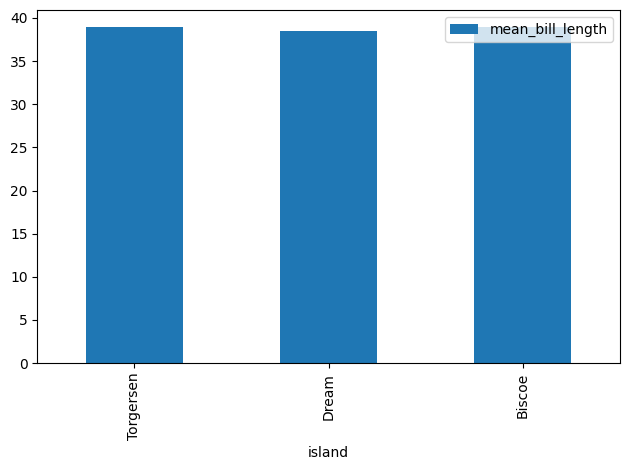

In [ ]:
# 방법 1
# ggplot(result, aes(x = "island", y = "mean_bill_length")) +\
# geom_col()

# 방법 2
(peng.filter(_.species == "Adelie")\
    .select(s.contains("mm"), peng.island)\
    .group_by("island")\
    .agg(mean_bill_length = _.bill_length_mm.mean())\
    .to_pandas()\
    .plot(x = "island", y = "mean_bill_length", kind = "bar"))

plt.tight_layout()
plt.show()


In [71]:
type(peng)

ibis.expr.types.relations.Table

In [74]:
# pivot longer 

peng.head()


┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

In [77]:

tmp = peng.pivot_longer(s.numeric(), names_to = "key", values_to = "value")
tmp

tmp.to_sql()


┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ species ┃ island    ┃ sex    ┃ key               ┃ value   ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string  │ string    │ string │ string            │ float64 │
├─────────┼───────────┼────────┼───────────────────┼─────────┤
│ Adelie  │ Torgersen │ Male   │ bill_length_mm    │    39.1 │
│ Adelie  │ Torgersen │ Male   │ bill_depth_mm     │    18.7 │
│ Adelie  │ Torgersen │ Male   │ flipper_length_mm │   181.0 │
│ Adelie  │ Torgersen │ Male   │ body_mass_g       │  3750.0 │
│ Adelie  │ Torgersen │ Female │ bill_length_mm    │    39.5 │
│ Adelie  │ Torgersen │ Female │ bill_depth_mm     │    17.4 │
│ Adelie  │ Torgersen │ Female │ flipper_length_mm │   186.0 │
│ Adelie  │ Torgersen │ Female │ body_mass_g       │  3800.0 │
│ Adelie  │ Torgersen │ Female │ bill_length_mm    │    40.3 │
│ Adelie  │ Torgersen │ Female │ bill_depth_mm     │    18.0 │
│ …       │ …         │ …      │ …                 │       … │
└─────────┴───────────┴────────┴───────────────────┴─────────┘

```sql
SELECT
  "t1"."species",
  "t1"."island",
  "t1"."sex",
  "t1"."__pivoted__"."key" AS "key",
  "t1"."__pivoted__"."value" AS "value"
FROM (
  SELECT
    "t0"."species",
    "t0"."island",
    "t0"."sex",
    UNNEST(
      CAST([
        {'key': 'bill_length_mm', 'value': "t0"."bill_length_mm"},
        {'key': 'bill_depth_mm', 'value': "t0"."bill_depth_mm"},
        {'key': 'flipper_length_mm', 'value': "t0"."flipper_length_mm"},
        {'key': 'body_mass_g', 'value': "t0"."body_mass_g"}
      ] AS STRUCT("key" TEXT, "value" DOUBLE)[])
    ) AS "__pivoted__"
  FROM "peng" AS "t0"
) AS "t1"
```

In [78]:
# pivot wider

peng.head()
tmp.pivot_wider(names_from = "key", values_from = "value")

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ species   ┃ island    ┃ sex    ┃ flipper_length_mm ┃ bill_length_mm ┃ bill_depth_mm ┃ body_mass_g ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ string    │ string    │ string │ float64           │ float64        │ float64       │ float64     │
├───────────┼───────────┼────────┼───────────────────┼────────────────┼───────────────┼─────────────┤
│ Gentoo    │ Biscoe    │ Female │             211.0 │           46.1 │          13.2 │      4500.0 │
│ Adelie    │ Dream     │ Male   │             178.0 │           37.2 │          18.1 │      3900.0 │
│ Chinstrap │ Dream     │ Female │             192.0 │           46.5 │          17.9 │      3500.0 │
│ Adelie    │ Torgersen │ Male   │             181.0 │           39.1 │          18.7 │      3750.0 │
│ Adelie    │ Biscoe    │ Female │             174.0 │           37.8 │          18.3 │      3400.0 │
│ Gentoo    │ Biscoe    │ NULL   │             216.0 │           44.5 │          14.3 │      4100.0 │
│ Adelie    │ Torgersen │ NULL   │             193.0 │           34.1 │          18.1 │      3475.0 │
│ Gentoo    │ Biscoe    │ Male   │             230.0 │           50.0 │          16.3 │      5700.0 │
│ Adelie    │ Dream     │ NULL   │             179.0 │           37.5 │          18.9 │      2975.0 │
│ Adelie    │ Dream     │ Female │             178.0 │           39.5 │          16.7 │      3250.0 │
│ …         │ …         │ …      │                 … │              … │             … │           … │
└───────────┴───────────┴────────┴───────────────────┴────────────────┴───────────────┴─────────────┘

In [79]:
# 결측치 처리
peng.head()

# 특정열 대상 결측치 처리
peng.bill_length_mm.isnull().sum()         # 특정열 결측치 갯수 
peng.filter(peng.bill_length_mm.notnull()) # 특정열 결측치 제외 데이터 보기
peng.bill_length_mm.fillna(0)              # 특정열 결측치 대체 

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

┌───┐
│ 2 │
└───┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ Male   │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ Female │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ Male   │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ NULL   │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ NULL   │
│ Adelie  │ Torgersen │           37.8 │          17.1 │             186.0 │      3300.0 │ NULL   │
│ …       │ …         │              … │             … │                 … │           … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Coalesce((bill_length_mm, 0)) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ float64                       │
├───────────────────────────────┤
│                          39.1 │
│                          39.5 │
│                          40.3 │
│                           0.0 │
│                          36.7 │
│                          39.3 │
│                          38.9 │
│                          39.2 │
│                          34.1 │
│                          42.0 │
│                             … │
└───────────────────────────────┘

In [80]:
# 2개열 결측치 대체
peng.mutate(bill_length_mm = _.bill_length_mm.fillna(0), sex = _.sex.fillna("unknown"))
peng.mutate(bill_length_mm = _.bill_length_mm.fillna(_.bill_length_mm.mean()), sex = _.sex.fillna("unknown"))

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex     ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string  │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼─────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male    │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female  │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female  │
│ Adelie  │ Torgersen │            0.0 │          NULL │              NULL │        NULL │ unknown │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female  │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ Male    │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ Female  │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ Male    │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ unknown │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ unknown │
│ …       │ …         │              … │             … │                 … │           … │ …       │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴─────────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex     ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string  │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼─────────┤
│ Adelie  │ Torgersen │       39.10000 │          18.7 │             181.0 │      3750.0 │ Male    │
│ Adelie  │ Torgersen │       39.50000 │          17.4 │             186.0 │      3800.0 │ Female  │
│ Adelie  │ Torgersen │       40.30000 │          18.0 │             195.0 │      3250.0 │ Female  │
│ Adelie  │ Torgersen │       43.92193 │          NULL │              NULL │        NULL │ unknown │
│ Adelie  │ Torgersen │       36.70000 │          19.3 │             193.0 │      3450.0 │ Female  │
│ Adelie  │ Torgersen │       39.30000 │          20.6 │             190.0 │      3650.0 │ Male    │
│ Adelie  │ Torgersen │       38.90000 │          17.8 │             181.0 │      3625.0 │ Female  │
│ Adelie  │ Torgersen │       39.20000 │          19.6 │             195.0 │      4675.0 │ Male    │
│ Adelie  │ Torgersen │       34.10000 │          18.1 │             193.0 │      3475.0 │ unknown │
│ Adelie  │ Torgersen │       42.00000 │          20.2 │             190.0 │      4250.0 │ unknown │
│ …       │ …         │              … │             … │                 … │           … │ …       │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴─────────┘

In [90]:
my_list = list(range(10))

[x ** 2 for x in my_list]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [85]:
# 결측치가 없는 행만 추출 : 모든 열에 대해서

peng.count()
all_columns_notnull_condition = [peng[col].notnull() for col in peng.columns]

peng_filtered = peng.filter(all_columns_notnull_condition)
peng_filtered.count()

┌─────┐
│ 344 │
└─────┘

┌─────┐
│ 333 │
└─────┘

In [91]:
# 모든 컬럼에서 결측치가 있는 행 제거
peng.dropna().count()

┌─────┐
│ 333 │
└─────┘

In [92]:

# 특정 컬럼들만, 둘 중 1변수에 결측치가 있어도 제거
peng.dropna(['bill_length_mm', 'bill_depth_mm']).count()

┌─────┐
│ 342 │
└─────┘

In [93]:
# how 옵션
peng.dropna(how = 'any').count()   # 하나라도 결측치 있으면 제거 (기본값)
peng.dropna(how = 'all').count()   # 모두 결측치인 행만 제거

┌─────┐
│ 333 │
└─────┘

┌─────┐
│ 344 │
└─────┘

In [94]:
# 중복치 처리

cnt_group = peng.group_by(peng.columns).aggregate(count = peng.count())
cnt_group

cnt_group.filter(cnt_group["count"] > 1)

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ count ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │ int64 │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────┤
│ Adelie  │ Torgersen │           37.8 │          17.1 │             186.0 │      3300.0 │ NULL   │     1 │
│ Adelie  │ Torgersen │           34.4 │          18.4 │             184.0 │      3325.0 │ Female │     1 │
│ Adelie  │ Biscoe    │           37.8 │          18.3 │             174.0 │      3400.0 │ Female │     1 │
│ Adelie  │ Biscoe    │           35.3 │          18.9 │             187.0 │      3800.0 │ Female │     1 │
│ Adelie  │ Dream     │           40.9 │          18.9 │             184.0 │      3900.0 │ Male   │     1 │
│ Adelie  │ Dream     │           42.2 │          18.5 │             180.0 │      3550.0 │ Female │     1 │
│ Adelie  │ Dream     │           39.8 │          19.1 │             184.0 │      4650.0 │ Male   │     1 │
│ Adelie  │ Biscoe    │           39.6 │          17.7 │             186.0 │      3500.0 │ Female │     1 │
│ Adelie  │ Biscoe    │           34.5 │          18.1 │             187.0 │      2900.0 │ Female │     1 │
│ Adelie  │ Biscoe    │           41.3 │          21.1 │             195.0 │      4400.0 │ Male   │     1 │
│ …       │ …         │              … │             … │                 … │           … │ …      │     … │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

┏━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃ species ┃ island ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ count ┃
┡━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ string  │ string │ float64        │ float64       │ float64           │ float64     │ string │ int64 │
└─────────┴────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────┘

In [95]:
# if else 사용

peng.agg(_.bill_length_mm.mean())

peng.mutate(big_small = ibis.ifelse(_.bill_length_mm > _.bill_length_mm.mean(), "big", "not big"))

┏━━━━━━━━━━━━━━━━━━━━━━┓
┃ Mean(bill_length_mm) ┃
┡━━━━━━━━━━━━━━━━━━━━━━┩
│ float64              │
├──────────────────────┤
│             43.92193 │
└──────────────────────┘

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ big_small ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │ string    │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼───────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │ not big   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │ not big   │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │ not big   │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │ not big   │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │ not big   │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ Male   │ not big   │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ Female │ not big   │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ Male   │ not big   │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ NULL   │ not big   │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ NULL   │ not big   │
│ …       │ …         │              … │             … │                 … │           … │ …      │ …         │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴───────────┘

In [96]:
peng_peng = peng.mutate(big_small = ibis.ifelse(_.bill_length_mm > _.bill_length_mm.mean(), "big", "not big"))

peng_peng.to_sql()

```sql
SELECT
  "t0"."species",
  "t0"."island",
  "t0"."bill_length_mm",
  "t0"."bill_depth_mm",
  "t0"."flipper_length_mm",
  "t0"."body_mass_g",
  "t0"."sex",
  CASE
    WHEN "t0"."bill_length_mm" > AVG("t0"."bill_length_mm") OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)
    THEN 'big'
    ELSE 'not big'
  END AS "big_small"
FROM "peng" AS "t0"
```

In [98]:
# ifelse가 여려 가지인 경우

peng.mutate(
    size = (_.bill_length_mm > 43)\
    .ifelse('big', (_.bill_length_mm > 30)\
            .ifelse('medium', 'small'))
)


┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃ size   ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │ medium │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │ medium │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │ medium │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │ small  │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │ medium │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ Male   │ medium │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ Female │ medium │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ Male   │ medium │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ NULL   │ medium │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ NULL   │ medium │
│ …       │ …         │              … │             … │                 … │           … │ …      │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┴────────┘

In [99]:
type(peng.agg(_.bill_length_mm.quantile([0.25, 0.5, 0.75])).execute())
type(peng.agg(_.bill_length_mm.quantile([0.25, 0.5, 0.75])))


pandas.core.frame.DataFrame

ibis.expr.types.relations.Table

In [101]:
# pandas 데이터 프레임 처리 : 속도 개선

!ls

df = pd.read_csv("penguins.csv")
tbl = ibis.memtable(df)

(한화) DATA Eng ineering_안내문.pdf
(한화) 프로그램 설치 안내.pdf
00_python_training.ipynb
01_pandas_training.ipynb
02_pandas_training.ipynb
03_numpy_training.ipynb
04_numpy_training.ipynb
05_ibis_training.ipynb
06_ibis_training.ipynb
07_ibis_training.ipynb
99_크롤링_인터넷.ipynb
iris.csv
mpg.csv
mydb.duckdb
mydb.duckdb.wal
old
penguins.csv
taxi.csv
강의_Python.key
분석용_student_cp949.csv
연습장.ipynb


In [103]:
tbl
type(tbl)

┏━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃ species ┃ island    ┃ bill_length_mm ┃ bill_depth_mm ┃ flipper_length_mm ┃ body_mass_g ┃ sex    ┃
┡━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ string  │ string    │ float64        │ float64       │ float64           │ float64     │ string │
├─────────┼───────────┼────────────────┼───────────────┼───────────────────┼─────────────┼────────┤
│ Adelie  │ Torgersen │           39.1 │          18.7 │             181.0 │      3750.0 │ Male   │
│ Adelie  │ Torgersen │           39.5 │          17.4 │             186.0 │      3800.0 │ Female │
│ Adelie  │ Torgersen │           40.3 │          18.0 │             195.0 │      3250.0 │ Female │
│ Adelie  │ Torgersen │           NULL │          NULL │              NULL │        NULL │ NULL   │
│ Adelie  │ Torgersen │           36.7 │          19.3 │             193.0 │      3450.0 │ Female │
│ Adelie  │ Torgersen │           39.3 │          20.6 │             190.0 │      3650.0 │ Male   │
│ Adelie  │ Torgersen │           38.9 │          17.8 │             181.0 │      3625.0 │ Female │
│ Adelie  │ Torgersen │           39.2 │          19.6 │             195.0 │      4675.0 │ Male   │
│ Adelie  │ Torgersen │           34.1 │          18.1 │             193.0 │      3475.0 │ NULL   │
│ Adelie  │ Torgersen │           42.0 │          20.2 │             190.0 │      4250.0 │ NULL   │
│ …       │ …         │              … │             … │                 … │           … │ …      │
└─────────┴───────────┴────────────────┴───────────────┴───────────────────┴─────────────┴────────┘

ibis.expr.types.relations.Table